In [2]:
#se instalan las librerias  
#!pip install statsmodels
#!pip install pyreadstat

In [26]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

import statsmodels.api as sm#estimación de muchos modelos estadísticos diferentes
import pyreadstat as pr # trabajar con formatos diferentes  extenciones .sav,etc...

from sklearn import  linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

%matplotlib inline

In [2]:
# para leer este archivo es con meta y df 
arc='compensacion-ejecutivos.sav'
df,meta=pr.read_sav(arc)
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [3]:
y=df['salario']
X=df.drop(['salario', 'noasiat','postgrad'],axis=1)
X

,gpa,experien
0,3.36,15.0
1,2.35,9.0
2,3.33,10.0
3,3.37,2.0
4,3.87,4.0
...,...,...
105,3.12,2.0
106,3.36,5.0
107,2.51,3.0
108,2.89,8.0


In [4]:
#OLS ordinari list sequel  
#mejores valores para a y b
reg_lin=sm.OLS(y,sm.add_constant(X)).fit()

In [5]:
print(reg_lin.summary())

                            OLS Regression Results                            
Dep. Variable:                salario   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     211.0
Date:                Thu, 08 Jul 2021   Prob (F-statistic):           7.37e-38
Time:                        15:03:07   Log-Likelihood:                -1135.4
No. Observations:                 110   AIC:                             2277.
Df Residuals:                     107   BIC:                             2285.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4968.0099   4325.267      1.149      0.2

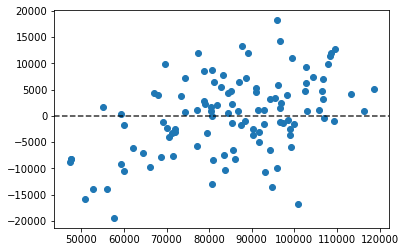

In [6]:
fig, ax=plt.subplots()

y_pred =reg_lin.predict(sm.add_constant(X))


ax.scatter(y, y - y_pred )

plt.axhline(y=0 ,color='black',alpha=0.8,linestyle='--')#linea horizontal

# **REGRESION LOGISTICA**
solo para variables categoricas 

In [7]:
df.columns

Index(['salario', 'noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')

In [8]:
df.salario.describe()

count       110.000000
mean      85256.518182
std       16419.359283
min       47279.000000
25%       74379.000000
50%       86384.000000
75%       96827.250000
max      118683.000000
Name: salario, dtype: float64

In [11]:
y=np.where(df['salario']>96000,1,0)# condicional para que escoja salarios mayores de 96000 para arriba
x=df.drop(['salario'],axis=1)
y

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

Text(0, 0.5, 'y')

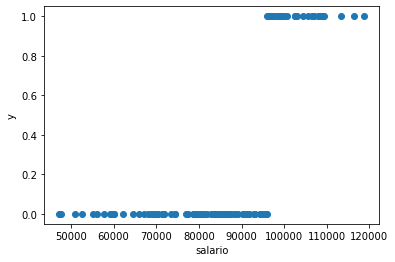

In [13]:
fig, ax=plt.subplots()
ax.scatter(df.salario,y)
ax.set_xlabel('salario')
ax.set_ylabel('y')

In [14]:
reg_log=linear_model.LogisticRegression()
reg_log.fit(x,y)
y_estimado=reg_log.predict_proba(x)

In [15]:
y_estimado

array([[4.39538178e-01, 5.60461822e-01],
       [9.78148894e-01, 2.18511060e-02],
       [6.59286204e-01, 3.40713796e-01],
       [9.82159113e-01, 1.78408868e-02],
       [6.70848737e-01, 3.29151263e-01],
       [2.03018004e-01, 7.96981996e-01],
       [9.22478258e-01, 7.75217424e-02],
       [4.20159794e-01, 5.79840206e-01],
       [8.03662576e-01, 1.96337424e-01],
       [9.77631167e-01, 2.23688334e-02],
       [9.06109495e-01, 9.38905048e-02],
       [8.47522747e-01, 1.52477253e-01],
       [9.95393767e-01, 4.60623344e-03],
       [3.19263966e-01, 6.80736034e-01],
       [7.63327838e-01, 2.36672162e-01],
       [7.67016117e-01, 2.32983883e-01],
       [9.73512282e-01, 2.64877181e-02],
       [5.91913095e-01, 4.08086905e-01],
       [3.77281945e-01, 6.22718055e-01],
       [9.99180746e-01, 8.19254265e-04],
       [3.20250422e-01, 6.79749578e-01],
       [8.22737645e-01, 1.77262355e-01],
       [5.15421891e-01, 4.84578109e-01],
       [9.88088141e-01, 1.19118594e-02],
       [9.950489

In [29]:
#estamacion con 1
y_estimado_1=reg_log.predict_proba(x)[:,1]
y_estimado=reg_log.predict(x)

In [27]:
#coefficientes que estan afectando el desempeno de logistica
y==y_estimado

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True, False, False,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [32]:
y_estimado_1, x

(array([5.60461822e-01, 2.18511060e-02, 3.40713796e-01, 1.78408868e-02,
        3.29151263e-01, 7.96981996e-01, 7.75217424e-02, 5.79840206e-01,
        1.96337424e-01, 2.23688334e-02, 9.38905048e-02, 1.52477253e-01,
        4.60623344e-03, 6.80736034e-01, 2.36672162e-01, 2.32983883e-01,
        2.64877181e-02, 4.08086905e-01, 6.22718055e-01, 8.19254265e-04,
        6.79749578e-01, 1.77262355e-01, 4.84578109e-01, 1.19118594e-02,
        4.95105410e-03, 2.22525593e-02, 5.72691371e-01, 1.06357265e-01,
        1.48324507e-02, 3.76063257e-01, 4.46845890e-01, 5.03537624e-01,
        4.76812772e-03, 5.53016419e-01, 1.57016516e-01, 5.90365186e-01,
        7.48524569e-02, 6.18930473e-01, 2.79821150e-01, 4.16278991e-01,
        3.02424904e-01, 1.51683200e-02, 5.59124020e-01, 2.46196442e-01,
        1.44120593e-02, 6.68076012e-01, 7.87662744e-01, 1.26051430e-01,
        8.57368843e-02, 6.64205865e-01, 9.58222158e-01, 9.66547648e-01,
        2.21804096e-02, 4.09341892e-02, 6.53760730e-01, 3.557119

In [38]:
metrics.accuracy_score(y,reg_log.predict(x))


0.9090909090909091

**Podemos ver que los no  asiaticos que tenga posgrados y experiencia  en un 90%**

In [39]:
x.columns

Index(['noasiat', 'gpa', 'postgrad', 'experien'], dtype='object')